# I will be examining a Kaggle dataset TMDB
# The Movie Database has over 10,866 movie titles and stats

Some questions I want to answer is what Genre's are most producded

How genre's have grown over time

What directors, production houses, and actors have generated the best returns

What the most profitable movies of all time are

In [2]:
#Importing Modules, setting seaborn as the format
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [3]:
df = pd.read_csv('tmdb-movies.csv')

In [4]:
#Checking the shape of the data
df.shape

(10866, 21)

In [5]:
#Looking at the first row
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [6]:
#Dropping the items we won't use in this analysis
df.drop(['id', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)

In [7]:
df.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [8]:
#Checking of the number of isnull items
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#Dropping the isnull items
df = df.dropna(axis=0, how='any')

In [10]:
#Double checking to make sure there are no isnull items
df.isnull().sum()

imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
#Seeing if anything is duplicated and seeing what it is
df[df.duplicated()]

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


In [12]:
#Dropping the duplicates
df = df.drop_duplicates()

In [13]:
#Checking to make sure no duplicates are in the list anymore
df.duplicated().sum()

0

In [14]:
#Creating another dataframe so we can always look back at our original
df1 = df.copy()
df1.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [15]:
#These are the columns with multiple values delimited by |
listcols = ['cast', 'keywords', 'director', 'genres', 'production_companies']

In [16]:
#Creating a list instead of a | delimited string
for y in listcols:
    df1[y] = df1[y].str.split(pat='|').tolist()

In [17]:
df1.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [18]:
#Taking the first cast member as the lead actor
df1['lead_actor'] = df1['cast'].str[0]

In [19]:
#Getting the second cast member as the supporting actor
df1['supporting_actor'] = df1['cast'].str[1]

In [20]:
#Getting the main director (listed first)
df1['maindir'] = df1['director'].str[0]

In [21]:
#Getting the main production company
df1['mainprod'] = df1['production_companies'].str[0]

In [22]:
#Getting the first genre in the list of genres as the main genre
df1['maingenre'] = df1['genres'].str[0]

In [23]:
#Creating a pivot table where we use the release_year as the index 
#Maingenre's will be the the categories with count as the aggregate function
genreyear = df1.pivot_table(index='release_year', columns='maingenre', values='original_title', aggfunc='count')

I am attempting to see the growth and trends of each genre on a macro level

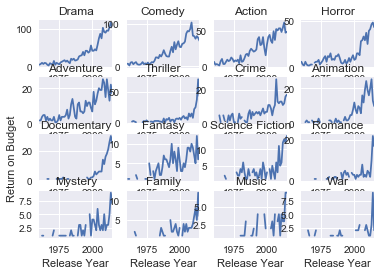

In [82]:
#Creating 16 subplots for all the main genres
plt.subplot(4,4,1)
genreyear['Drama'].plot()
plt.title('Drama')

plt.subplot(4,4,2)
genreyear['Comedy'].plot()
plt.title('Comedy')

plt.subplot(4,4,3)
genreyear['Action'].plot()
plt.title('Action')

plt.subplot(4,4,4)
genreyear['Horror'].plot()
plt.title('Horror')

plt.subplot(4,4,5)
genreyear['Adventure'].plot()
plt.title('Adventure')

plt.subplot(4,4,6)
genreyear['Thriller'].plot()
plt.title('Thriller')

plt.subplot(4,4,7)
genreyear['Crime'].plot()
plt.title('Crime')

plt.subplot(4,4,8)
genreyear['Animation'].plot()
plt.title('Animation')

plt.subplot(4,4,9)
genreyear['Documentary'].plot()
plt.title('Documentary')
plt.ylabel('Return on Budget')

plt.subplot(4,4,10)
genreyear['Fantasy'].plot()
plt.title('Fantasy')

plt.subplot(4,4,11)
genreyear['Science Fiction'].plot()
plt.title('Science Fiction')

plt.subplot(4,4,12)
genreyear['Romance'].plot()
plt.title('Romance')

plt.subplot(4,4,13)
genreyear['Mystery'].plot()
plt.title('Mystery')
plt.xlabel('Release Year')

plt.subplot(4,4,14)
genreyear['Family'].plot()
plt.title('Family')
plt.xlabel('Release Year')

plt.subplot(4,4,15)
genreyear['Music'].plot()
plt.title('Music')
plt.xlabel('Release Year')

plt.subplot(4,4,16)
genreyear['War'].plot()
plt.title('War')
plt.xlabel('Release Year')

plt.show()

I am potting the main Genres based on release year to see what is on trend and what is being released recently

[]

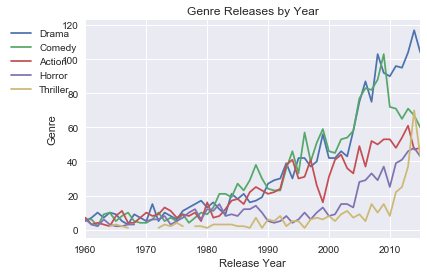

In [30]:
#Plotting the lines of each of the main Genre's to see their growth
genreyear[['Drama','Comedy','Action','Horror','Thriller']].plot()
plt.legend(bbox_to_anchor=(0, 1), loc='best', ncol=1)
plt.ylabel('Genre')
plt.xlabel("Release Year")
plt.title("Genre Releases by Year")
plt.plot()

We can see that Drama has had the most growth, comedies grew but have declined, and thrillers had lots of growth in 2010

In [31]:
#Getting a count of each genre
df1['maingenre'].value_counts().head(14)

Drama              1980
Comedy             1849
Action             1333
Horror              738
Adventure           511
Thriller            405
Crime               341
Animation           286
Documentary         225
Fantasy             225
Science Fiction     170
Romance             139
Mystery             104
Family              100
Name: maingenre, dtype: int64

Looking at it a bit differently I want to see the distribution of each Genre in a pie chart

Drama and Comedy make up the most movies produced throughout time but are they the most profitable choice?

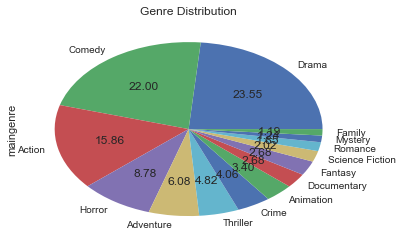

In [32]:
#Plotting the distribution of genres produced
df1['maingenre'].value_counts().head(14).plot(kind='pie', title='Genre Distribution', autopct='%.2f')

In [33]:
#Creating a pivot table where we use the genre as the index 
#budget will be the the categories with average as the aggregate function
genrebudget = df1.pivot_table(index='release_year', columns='maingenre', values='original_title', aggfunc='count')

In [34]:
#Dropping the isnull items
df1 = df1.dropna(axis=0, how='any')
df1.isnull().sum()

imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
lead_actor              0
supporting_actor        0
maindir                 0
mainprod                0
maingenre               0
dtype: int64

In [35]:
#Creating a category called return on budget which divides the revenue adj by budget adj
df1['ReturnOnBudget'] = df1['revenue_adj']/df1['budget_adj']

In [36]:
dfall = df1[df1.ReturnOnBudget<9999]

Now looking at the return on budget by Genre to see the most profitable genres

In [37]:
#Horror movies have a much higher return on budget
allsuccess = dfall.groupby('maingenre')['ReturnOnBudget'].mean().sort_values(ascending=False)
allsuccess

maingenre
Horror             32.495240
Documentary        23.669237
Science Fiction    10.453361
Comedy              5.947024
Family              4.878941
Adventure           4.611401
History             4.069133
Romance             3.962622
Drama               3.722834
Crime               3.248448
Thriller            3.019372
Music               2.991483
Fantasy             2.888289
Animation           2.746469
Mystery             2.724054
Action              2.234088
Western             1.693154
TV Movie            1.680000
War                 1.429379
Name: ReturnOnBudget, dtype: float64

Horror averages about 32.5x return on budget! Documentaries are the second highest with 23.67x

Looks like production studios may be underproducing horror and documentaries


Because Horror is the top returning Genre we are looking at the top Horror Directors and Production Houses

In [38]:
#Building a list of the top directors
topdirs = df1['maindir'].value_counts().head(40).index
topdirs = df1[(df1.maingenre=='Horror')]['maindir'].value_counts().head(18)
print(topdirs)
topdirs = df1[(df1.maingenre=='Horror')]['maindir'].value_counts().head(18).index

Wes Craven             12
George A. Romero        8
John Carpenter          7
Dario Argento           7
Terence Fisher          7
Darren Lynn Bousman     6
David Cronenberg        6
David R. Ellis          5
Steve Miner             5
Tobe Hooper             5
James Wan               5
Roger Corman            5
Eli Roth                4
John Erick Dowdle       4
Roy Ward Baker          4
Rob Zombie              4
Don Coscarelli          4
Sam Raimi               4
Name: maindir, dtype: int64


We can see that Wes Craven and George A. Romero are the directors with the most movies directed

Since Wes Craven is the top producer of Horror movies it's worth exploring his catalog

In [127]:
#Looking at Wes Craven's title catalog
df1[(df1.maindir=='Wes Craven') & (df1.maingenre=='Horror')]

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,maindir,mainprod,maingenre,ReturnOnBudget
1372,tt0077681,0.137351,230000,25000000,The Hills Have Eyes,"[Martin Speer, Russ Grieve, John Steadman, Jam...",[Wes Craven],"[rape, mutation, government, murder, blood]",89,[Horror],...,6.0,1977,8.274896e+05,8.994453e+07,Martin Speer,Russ Grieve,Wes Craven,Blood Relations Co.,Horror,108.695652
3483,tt1262416,0.929466,40000000,97138686,Scream 4,"[David Arquette, Neve Campbell, Courteney Cox,...",[Wes Craven],"[sheriff, book, knife, horror, rescue]",111,"[Horror, Mystery]",...,6.0,2011,3.877592e+07,9.416605e+07,David Arquette,Neve Campbell,Wes Craven,Dimension Films,Horror,2.428467
4211,tt0111686,0.848473,14000000,18090181,New Nightmare,"[Heather Langenkamp, Robert Englund, Miko Hugh...",[Wes Craven],"[film director, nightmare, shooting, freddy kr...",112,"[Horror, Thriller, Mystery, Fantasy]",...,6.4,1994,2.059556e+07,2.661267e+07,Heather Langenkamp,Robert Englund,Wes Craven,New Line Cinema,Horror,1.292156
5259,tt0120082,1.109101,24000000,172363301,Scream 2,"[David Arquette, Neve Campbell, Courteney Cox,...",[Wes Craven],"[film festivals, slaughter, slasher]",120,"[Horror, Mystery]",...,6.0,1997,3.260305e+07,2.341487e+08,David Arquette,Neve Campbell,Wes Craven,Miramax Films,Horror,7.181804
6303,tt0257516,0.661616,35000000,19294901,Cursed,"[Portia de Rossi, Christina Ricci, Jesse Eisen...",[Wes Craven],"[bite, transformation, supernatural powers, si...",97,"[Horror, Comedy]",...,5.0,2005,3.907972e+07,2.154398e+07,Portia de Rossi,Christina Ricci,Wes Craven,Craven-Maddalena Films,Horror,0.551283
6356,tt0421239,0.441927,26000000,57891803,Red Eye,"[Rachel McAdams, Cillian Murphy, Brian Cox, Ja...",[Wes Craven],"[hostage, menace, hitman, airplane]",85,"[Horror, Thriller]",...,6.1,2005,2.903065e+07,6.463986e+07,Rachel McAdams,Cillian Murphy,Wes Craven,DreamWorks SKG,Horror,2.226608
7280,tt0068833,0.384193,90000,0,The Last House on the Left,"[Sandra Peabody, Lucy Grantham, David Hess, Fr...",[Wes Craven],"[rape, gun, birthday, concert, death of a child]",84,"[Horror, Thriller]",...,6.1,1972,4.693105e+05,0.000000e+00,Sandra Peabody,Lucy Grantham,Wes Craven,Lobster Enterprises,Horror,0.000000
7891,tt0087800,1.331432,1800000,25504513,A Nightmare on Elm Street,"[John Saxon, Ronee Blakley, Heather Langenkamp...",[Wes Craven],"[child murderer, sleep, coffee, hat, nightmare]",91,[Horror],...,7.1,1984,3.778276e+06,5.353504e+07,John Saxon,Ronee Blakley,Wes Craven,New Line Cinema,Horror,14.169174
7945,tt0089274,0.333174,700000,0,The Hills Have Eyes Part II,"[Tamara Stafford, Kevin Spirtas, Colleen Riley...",[Wes Craven],"[bus ride, desert]",86,[Horror],...,4.1,1984,1.469329e+06,0.000000e+00,Tamara Stafford,Kevin Spirtas,Wes Craven,Castle Hill Productions,Horror,0.000000
8736,tt0134084,0.542611,40000000,161834276,Scream 3,"[David Arquette, Neve Campbell, Courteney Cox,...",[Wes Craven],"[mask, metal detector, film director, ex-cop, ...",116,"[Horror, Mystery]",...,5.6,2000,5.065168e+07,2.049295e+08,David Arquette,Neve Campbell,Wes Craven,Konrad Pictures,Horror,4.045857


Now looking at the 2nd highest director in horror, George Romero to see his body of work

It looks like he's known for his work in the Zombie genre

In [40]:
#Looking at George Romeros catalog also to see he's the top Zombie movie producer
df1[(df1.maindir=='George A. Romero') & (df1.maingenre=='Horror')]

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,maindir,mainprod,maingenre,ReturnOnBudget
1376,tt0077914,0.113714,0,0,Martin,"[John Amplas, Lincoln Maazel, Christine Forres...",[George A. Romero],"[vampire, blood, razor blade]",95,[Horror],...,6.3,1977,0.000000e+00,0.000000e+00,John Amplas,Lincoln Maazel,George A. Romero,Laurel Entertainment Inc.,Horror,NaN
1639,tt1134854,0.394989,4000000,143191,Survival of the Dead,"[Alan van Sprang, Kenneth Welsh, Kathleen Munr...",[George A. Romero],[zombies],90,"[Horror, Science Fiction]",...,4.6,2009,4.065602e+06,1.455394e+05,Alan van Sprang,Kenneth Welsh,George A. Romero,Devonshire Productions,Horror,0.035798
6106,tt0088993,0.689416,3500000,34000000,Day of the Dead,"[Lori Cardille, Terry Alexander, Joseph Pilato...",[George A. Romero],"[florida, insanity, disembodied head, zombies,...",102,"[Horror, Science Fiction]",...,6.7,1985,7.095081e+06,6.892365e+07,Lori Cardille,Terry Alexander,George A. Romero,Dead Films,Horror,9.714286
6294,tt0418819,0.694404,15000000,46770602,Land of the Dead,"[Simon Baker, John Leguizamo, Dennis Hopper, R...",[George A. Romero],"[cage, dystopia, survivor, zombies, zombie apo...",93,[Horror],...,5.8,2005,1.674845e+07,5.222234e+07,Simon Baker,John Leguizamo,George A. Romero,Universal Pictures,Horror,3.118040
7503,tt0848557,0.663819,2000000,5364858,Diary of the Dead,"[Michelle Morgan, Joshua Close, Shawn Roberts,...",[George A. Romero],"[zombies, found footage]",95,"[Horror, Action, Science Fiction]",...,5.3,2007,2.103337e+06,5.642053e+06,Michelle Morgan,Joshua Close,George A. Romero,Artfire Films,Horror,2.682429
8919,tt0083767,0.441852,8000000,21028755,Creepshow,"[Leslie Nielsen, Ed Harris, Hal Holbrook, Ted ...",[George A. Romero],"[monster, halloween, meteor, buried alive, coc...",120,"[Horror, Comedy, Fantasy]",...,6.7,1982,1.807714e+07,4.751747e+07,Leslie Nielsen,Ed Harris,George A. Romero,Warner Bros.,Horror,2.628594
9721,tt0063350,1.058272,114000,0,Night of the Living Dead,"[Duane Jones, Judith O'Dea, Karl Hardman, Mari...",[George A. Romero],"[loss of father, siblings, midnight movie, zom...",96,[Horror],...,7.2,1968,7.146619e+05,0.000000e+00,Duane Jones,Judith O'Dea,George A. Romero,Laurel Group,Horror,0.000000
10757,tt0077402,1.210531,650000,55000000,Dawn of the Dead,"[David Emge, Ken Foree, Scott H. Reiniger, Gay...",[George A. Romero],"[total destruction, helicopter, news broadcast...",127,[Horror],...,7.2,1978,2.172755e+06,1.838485e+08,David Emge,Ken Foree,George A. Romero,Laurel Group,Horror,84.615385


No looking at how Horror movie directors performed based on return on budget

In [41]:
#Looking at horror directors based on performance
horrors = df1[(df1.maingenre=='Horror') & (df1.ReturnOnBudget<9999) & (df1['maindir'].isin(topdirs)) ]
horrors.groupby('maindir')['ReturnOnBudget'].median().sort_values(ascending=False)

maindir
James Wan              24.461549
Darren Lynn Bousman    16.387682
Tobe Hooper            11.420561
Eli Roth               10.139694
Roger Corman            5.000000
John Carpenter          4.727497
John Erick Dowdle       3.404618
Steve Miner             3.237749
George A. Romero        2.682429
Rob Zombie              2.516159
Sam Raimi               2.336689
Wes Craven              2.327537
David R. Ellis          1.879455
David Cronenberg        0.178128
Dario Argento           0.000727
Don Coscarelli          0.000000
Name: ReturnOnBudget, dtype: float64

James Wan has a median of 24.46x Return on Budget! This is much higher than his peers. Darren Lynn Bousman also comes in at 16x

Examining James Wan's catalog to see his movies

In [42]:
#Looking at James Wan's catalog
df1[(df1.maindir=='James Wan') & (df1.maingenre=='Horror')]

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,maindir,mainprod,maingenre,ReturnOnBudget
1964,tt1591095,1.396973,1500000,97009150,Insidious,"[Patrick Wilson, Rose Byrne, Barbara Hershey, ...",[James Wan],"[medium, evil spirit, house warming, aftercred...",103,"[Horror, Thriller]",...,6.7,2010,1.500000e+06,9.700915e+07,Patrick Wilson,Rose Byrne,James Wan,Alliance Films,Horror,64.672767
5438,tt1457767,3.472358,13000000,318000141,The Conjuring,"[Patrick Wilson, Vera Farmiga, Ron Livingston,...",[James Wan],"[sister sister relationship, exorcism, rhode i...",112,"[Horror, Thriller]",...,7.4,2013,1.216843e+07,2.976587e+08,Patrick Wilson,Vera Farmiga,James Wan,New Line Cinema,Horror,24.461549
5478,tt2226417,1.473406,5000000,0,Insidious: Chapter 2,"[Patrick Wilson, Rose Byrne, Ty Simpkins, Lin ...",[James Wan],"[haunted house, possession, demon, family, ghost]",106,"[Horror, Thriller]",...,6.5,2013,4.680167e+06,0.000000e+00,Patrick Wilson,Rose Byrne,James Wan,Sony Pictures,Horror,0.000000
7011,tt0387564,1.309753,1200000,103911669,Saw,"[Cary Elwes, Danny Glover, Monica Potter, Mich...",[James Wan],"[shotgun, based on short film, sadist, pistol,...",103,"[Horror, Mystery, Crime]",...,7.1,2004,1.385334e+06,1.199603e+08,Cary Elwes,Danny Glover,James Wan,Twisted Pictures,Horror,86.593058
7675,tt0455760,0.258046,20000000,22217407,Dead Silence,"[Ryan Kwanten, Donnie Wahlberg, Bob Gunton, Am...",[James Wan],"[ventriloquist, doll, ventriloquist dummy]",89,[Horror],...,6.2,2007,2.103337e+07,2.336535e+07,Ryan Kwanten,Donnie Wahlberg,James Wan,Universal Pictures,Horror,1.110870


Looks like James Wan was able to create really unique thematic movies like Saw and The Conjuring

Also going to look at Darren Lynn Bousman

In [43]:
#Also looking at Darren Lynn Bousman
df1[(df1.maindir=='Darren Lynn Bousman') & (df1.maingenre=='Horror')]

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,maindir,mainprod,maingenre,ReturnOnBudget
310,tt4163020,0.393642,0,0,Tales of Halloween,"[Keir Gilchrist, Pollyanna McIntosh, Samuel Wi...","[Darren Lynn Bousman, Axelle Carolyn, Adam Gie...","[witch, based on novel, halloween, death, evil]",90,[Horror],...,5.3,2015,0.000000e+00,0.000000e+00,Keir Gilchrist,Pollyanna McIntosh,Darren Lynn Bousman,Epic Pictures Group,Horror,NaN
3148,tt0963194,0.324091,0,188126,Repo! The Genetic Opera,"[Alexa PenaVega, Paul Sorvino, Anthony Stewart...",[Darren Lynn Bousman],[dystopia],98,"[Horror, Comedy, Music, Science Fiction]",...,6.5,2008,0.000000e+00,1.905315e+05,Alexa PenaVega,Paul Sorvino,Darren Lynn Bousman,Lions Gate Films,Horror,inf
3550,tt1712159,0.609790,0,0,11/11/2011,"[Michael Landes, Timothy Gibbs, Wendy Glenn, L...",[Darren Lynn Bousman],[brother brother relationship],90,"[Horror, Thriller]",...,4.6,2011,0.000000e+00,0.000000e+00,Michael Landes,Timothy Gibbs,Darren Lynn Bousman,Canonigo Films,Horror,NaN
6239,tt0432348,1.107734,4000000,152925093,Saw II,"[Tobin Bell, Shawnee Smith, Donnie Wahlberg, F...",[Darren Lynn Bousman],"[riddle, serial killer]",92,[Horror],...,6.2,2005,4.466253e+06,1.707505e+08,Tobin Bell,Shawnee Smith,Darren Lynn Bousman,Lions Gate Films,Horror,38.231273
6638,tt0489270,0.849096,10000000,163876815,Saw III,"[Tobin Bell, Shawnee Smith, Angus Macfadyen, B...",[Darren Lynn Bousman],"[brain tumor, nudity, suffocation, mutilation,...",108,"[Horror, Thriller, Crime]",...,6.0,2006,1.081669e+07,1.772605e+08,Tobin Bell,Shawnee Smith,Darren Lynn Bousman,Lions Gate Films,Horror,16.387682
7454,tt0890870,1.049862,10000000,139352633,Saw IV,"[Tobin Bell, Scott Patterson, Costas Mandylor,...",[Darren Lynn Bousman],"[ice, victim, pain, games, psychopath]",93,"[Horror, Thriller, Crime]",...,5.8,2007,1.051669e+07,1.465528e+08,Tobin Bell,Scott Patterson,Darren Lynn Bousman,Lions Gate Films,Horror,13.935263


Worth noting that two most successful horror directors were involved in the Saw movies

Darren Lynn was able to capitalize on the Saw franchise and create great (but not as great as the originals) return on budget

In [44]:
#Using the counter function to count the most common genres
from collections import Counter
mostgenres = Counter(df['genres'])

Now looking at the most common genres from the Genres list

In [45]:
#Using most_common(25) to see the top 25 genre's just to show we can count it without putting them in a list
mostgenres.most_common(25)

[('Drama', 566),
 ('Comedy', 525),
 ('Drama|Romance', 248),
 ('Comedy|Drama', 233),
 ('Comedy|Romance', 223),
 ('Horror|Thriller', 212),
 ('Horror', 189),
 ('Comedy|Drama|Romance', 185),
 ('Documentary', 160),
 ('Drama|Thriller', 111),
 ('Comedy|Family', 81),
 ('Action|Thriller', 78),
 ('Drama|Comedy', 73),
 ('Crime|Drama|Thriller', 71),
 ('Thriller', 69),
 ('Crime|Drama', 66),
 ('Comedy|Horror', 57),
 ('Animation|Family', 56),
 ('Drama|Comedy|Romance', 53),
 ('Drama|History', 52),
 ('Action|Comedy', 51),
 ('Action|Crime|Drama|Thriller', 50),
 ('Action|Crime|Thriller', 48),
 ('Drama|Horror|Thriller', 47),
 ('Horror|Mystery|Thriller', 47)]

Again we see that Drama and Comedy top the list as the most produced movie types

Making a dataframe of big budgets success films (4x revenue/budget, budget of $75MM+ & released in 1990 or later)

In [46]:
#4x revenue/budget, <9999 Return on budget, budget of $75MM+ & released in 1990 or later)
dfbbsuccess = df1[(df1.ReturnOnBudget>4) & (df1.ReturnOnBudget<9999) & (df1.budget_adj>75000000) & (df1.release_year>=1990)]

Now makign a list of the top 10 Directors of these big budget movies

In [100]:
#Making a list of the top 10 directors of big budget successes
#Setting that list to be an index so we can check who's in the list with later code
dfbbdirs = dfbbsuccess.groupby('maindir')['ReturnOnBudget'].mean().sort_values(ascending=False).head(20).index
dfbbdirs

Index(['J.J. Abrams', 'Colin Trevorrow', 'Peter Jackson', 'Steve Martino',
       'Andrew Stanton', 'James Cameron', 'Robert Zemeckis', 'Chris Buck',
       'David Yates', 'Chris Columbus', 'Kevin Reynolds', 'James Wan',
       'Roland Emmerich', 'Carlos Saldanha', 'David Silverman', 'George Lucas',
       'Steven Spielberg', 'Bill Condon', 'Barry Sonnenfeld',
       'Alfonso CuarÃ³n'],
      dtype='object', name='maindir')

Now I examine directors performance, seeing that JJ Abrams is the top big budget director

In [109]:
#Making a list of the top 10 Production Studios
dfbbdirperf = dfbbsuccess.groupby('maindir')['ReturnOnBudget'].median().sort_values(ascending=False).head(20)
print(dfbbdirperf)


maindir
Peter Jackson       10.547355
J.J. Abrams         10.340891
Colin Trevorrow     10.090192
Steve Martino        9.234156
James Cameron        9.225171
Andrew Stanton       9.198149
Robert Zemeckis      8.549985
Chris Buck           8.494793
David Yates          8.438647
Chris Columbus       8.289345
Kevin Reynolds       8.135290
James Wan            7.927628
Roland Emmerich      7.623551
George Lucas         7.522124
David Silverman      7.027585
Carlos Saldanha      6.823301
Bill Condon          6.691311
Barry Sonnenfeld     6.548784
Alfonso CuarÃ³n      6.449104
Mike Gabriel         6.292360
Name: ReturnOnBudget, dtype: float64


In [107]:
#Making a list of the all movies that are made by the top 10 directors
dfbbdirslist = df1[df1['maindir'].isin(dfbbdirs)]

Now we will look at the top directors recent returns, hoping to see their recent performance in movie directing.

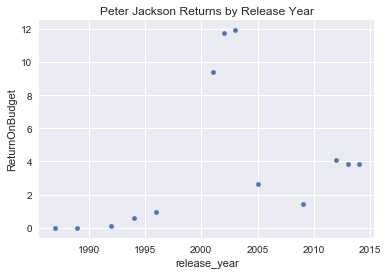

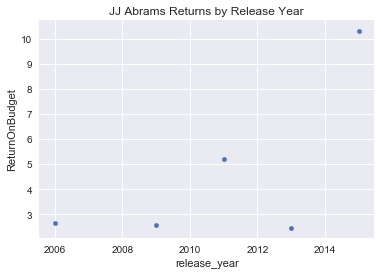

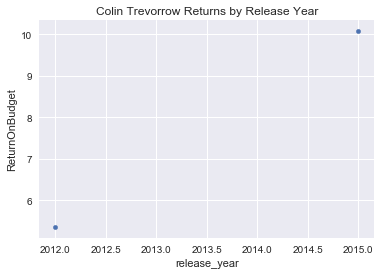

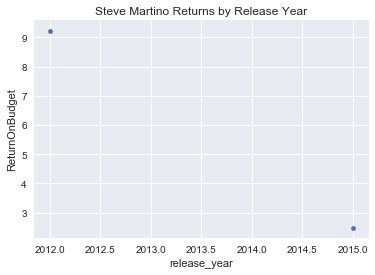

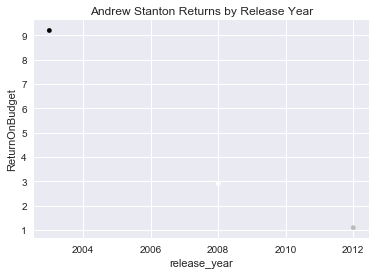

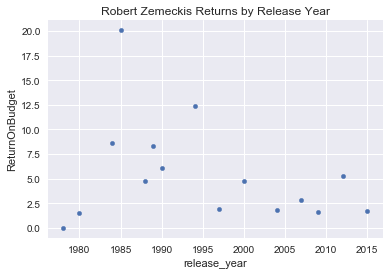

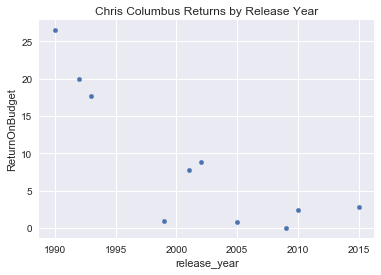

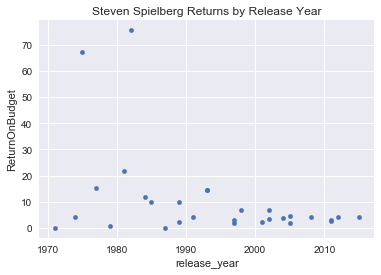

In [111]:
#Plotting all big budget directors recent performance
dfbbdirslist[dfbbdirslist['maindir']=='Peter Jackson'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Peter Jackson Returns by Release Year')
dfbbdirslist[dfbbdirslist['maindir']=='J.J. Abrams'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='JJ Abrams Returns by Release Year')
dfbbdirslist[dfbbdirslist['maindir']=='Colin Trevorrow'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Colin Trevorrow Returns by Release Year')
dfbbdirslist[dfbbdirslist['maindir']=='Steve Martino'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Steve Martino Returns by Release Year')
dfbbdirslist[dfbbdirslist['maindir']=='Andrew Stanton'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Andrew Stanton Returns by Release Year')
dfbbdirslist[dfbbdirslist['maindir']=='Robert Zemeckis'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Robert Zemeckis Returns by Release Year')
dfbbdirslist[dfbbdirslist['maindir']=='Chris Columbus'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Chris Columbus Returns by Release Year')
dfbbdirslist[dfbbdirslist['maindir']=='Steven Spielberg'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Steven Spielberg Returns by Release Year')

We can see that Peter Jackson is indeed the best return on budget director and the trends of the other top directors, some of which haven't produced a movie in a while. But we can look at their performance by year to see them throughout time

Now looking at the main production houses return on budget

In [50]:
#Making a list of the top 10 Production Studios
dfbbprods = dfbbsuccess.groupby('mainprod')['ReturnOnBudget'].median().sort_values(ascending=False).head(20)
print(dfbbprods)
dfbbprods = dfbbsuccess.groupby('mainprod')['ReturnOnBudget'].median().sort_values(ascending=False).head(20).index

mainprod
WingNut Films                     10.547355
Universal Studios                 10.090192
Blue Sky Studios                   8.261760
Warner Bros.                       8.135290
1492 Pictures                      7.811804
Lucasfilm                          7.522124
Gracie Films                       7.027585
Summit Entertainment               6.691311
Lionsgate                          6.267722
Cool Music                         6.254752
United Artists                     6.072311
Patalex IV Productions Limited     5.972807
Regency Enterprises                5.908533
Kennedy/Marshall Company, The      5.670110
Village Roadshow Pictures          5.562548
DreamWorks SKG                     5.514629
Amblin Entertainment               5.423355
DC Comics                          5.415794
Walt Disney Pictures               5.315860
Columbia Pictures Corporation      5.258577
Name: ReturnOnBudget, dtype: float64


Wingnut and Universal stand out as the most successful production studios

In [51]:
#Making a list of just movies made by the top producers
dfbbprodslist = df1[df1['mainprod'].isin(dfbbprods)]
dfbbprodslist

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,maindir,mainprod,maingenre,ReturnOnBudget
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]",...,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Colin Trevorrow,Universal Studios,Action,10.090192
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]",...,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,George Miller,Village Roadshow Pictures,Action,2.522909
2,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]",...,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Robert Schwentke,Summit Entertainment,Adventure,2.683984
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]",...,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,J.J. Abrams,Lucasfilm,Action,10.340891
5,tt1663202,9.110700,135000000,532950503,The Revenant,"[Leonardo DiCaprio, Tom Hardy, Will Poulter, D...",[Alejandro GonzÃ¡lez IÃ±Ã¡rritu],"[father-son relationship, rape, based on novel...",156,"[Western, Drama, Adventure, Thriller]",...,7.2,2015,1.241999e+08,4.903142e+08,Leonardo DiCaprio,Tom Hardy,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Regency Enterprises,Western,3.947782
9,tt2096673,6.326804,175000000,853708609,Inside Out,"[Amy Poehler, Phyllis Smith, Richard Kind, Bil...",[Pete Docter],"[dream, cartoon, imaginary friend, animation, ...",94,"[Comedy, Animation, Family]",...,8.0,2015,1.609999e+08,7.854116e+08,Amy Poehler,Phyllis Smith,Pete Docter,Walt Disney Pictures,Comedy,4.878335
11,tt1617661,6.189369,176000003,183987723,Jupiter Ascending,"[Mila Kunis, Channing Tatum, Sean Bean, Eddie ...","[Lana Wachowski, Lilly Wachowski]","[jupiter, space, woman director, 3d, interspec...",124,"[Science Fiction, Fantasy, Action, Adventure]",...,5.2,2015,1.619199e+08,1.692686e+08,Mila Kunis,Channing Tatum,Lana Wachowski,Village Roadshow Pictures,Science Fiction,1.045385
18,tt1661199,5.556818,95000000,542351353,Cinderella,"[Lily James, Cate Blanchett, Richard Madden, H...",[Kenneth Branagh],"[cinderella, magic, fairy tale, princess, shoe]",112,"[Romance, Fantasy, Family, Drama]",...,6.8,2015,8.739996e+07,4.989630e+08,Lily James,Cate Blanchett,Kenneth Branagh,Walt Disney Pictures,Romance,5.708962
20,tt1964418,5.462138,190000000,209035668,Tomorrowland,"[Britt Robertson, George Clooney, Raffey Cassi...",[Brad Bird],"[inventor, apocalypse, destiny, imax, dreamer]",130,"[Action, Family, Science Fiction, Adventure, M...",...,6.2,2015,1.747999e+08,1.923127e+08,Britt Robertson,George Clooney,Brad Bird,Walt Disney Pictures,Action,1.100188
33,tt3682448,3.648210,40000000,162610473,Bridge of Spies,"[Tom Hanks, Mark Rylance, Amy Ryan, Alan Alda,...",[Steven Spielberg],"[spy, cia, cold war, pilot, lawyer]",141,"[Thriller, Drama]",...,7.1,2015,3.679998e+07,1.496016e+08,Tom Hanks,Mark Rylance,Steven Spielberg,DreamWorks SKG,Thriller,4.065262


Examining Wingnut Films to see why they are so successful

We can see that Wingnut was able to create success by producing the Lord of the Rings and Hobbit Franchises

They also did well with District 9 and some success with King Kong, but not much else

Hollywood has always put an emphasis on building franchises and its obvious to see why here

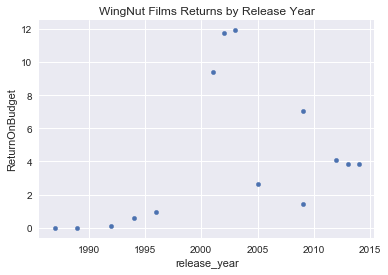

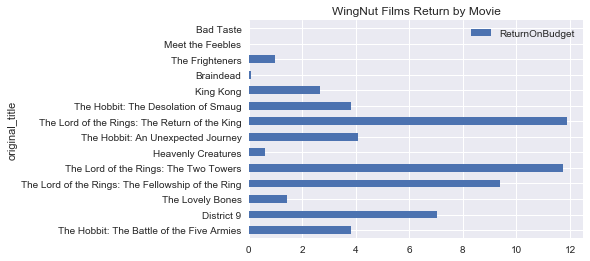

In [52]:
#Examining Wingnut Films
dfbbprodslist[dfbbprodslist['mainprod']=='WingNut Films'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='WingNut Films Returns by Release Year')
dfbbprodslist[dfbbprodslist['mainprod']=='WingNut Films'].plot(x='original_title', y='ReturnOnBudget', kind='barh', title='WingNut Films Return by Movie')


Now we're going to see the major production houses did by release year to see how they've been performing recently


We see that Universal has been great ever since 2000

Warner Brothers deserves honorable mention also as they produced many movies, a lot of which are profitable

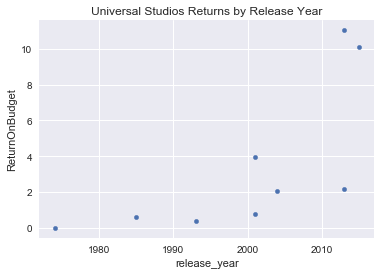

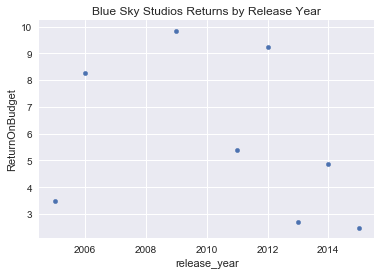

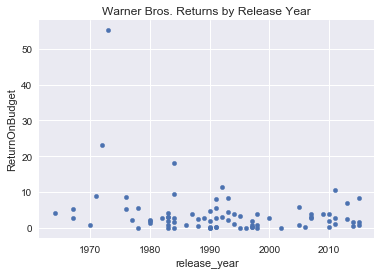

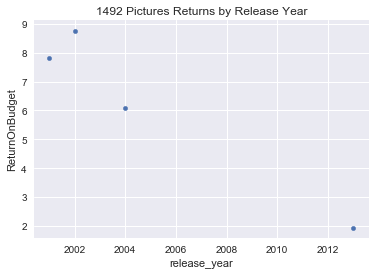

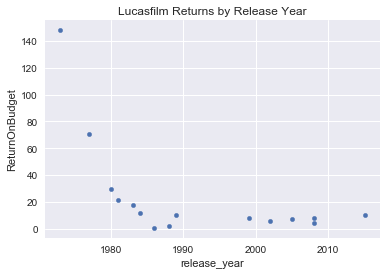

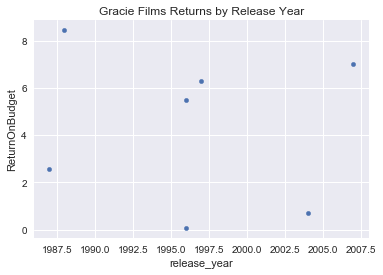

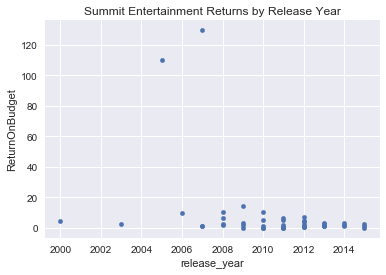

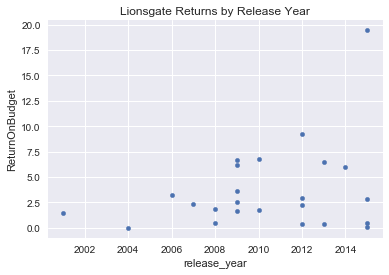

In [113]:
#Now we're plotting the performance of all the other successful major studios to see who's been doing well recently
dfbbprodslist[dfbbprodslist['mainprod']=='Universal Studios'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Universal Studios Returns by Release Year')
dfbbprodslist[dfbbprodslist['mainprod']=='Blue Sky Studios'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Blue Sky Studios Returns by Release Year')
dfbbprodslist[dfbbprodslist['mainprod']=='Warner Bros.'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Warner Bros. Returns by Release Year')
dfbbprodslist[dfbbprodslist['mainprod']=='1492 Pictures'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='1492 Pictures Returns by Release Year')
dfbbprodslist[dfbbprodslist['mainprod']=='Lucasfilm'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Lucasfilm Returns by Release Year')
dfbbprodslist[dfbbprodslist['mainprod']=='Gracie Films'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Gracie Films Returns by Release Year')
dfbbprodslist[dfbbprodslist['mainprod']=='Summit Entertainment'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Summit Entertainment Returns by Release Year')
dfbbprodslist[dfbbprodslist['mainprod']=='Lionsgate'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Lionsgate Returns by Release Year')

Lion's Gate looks like its had the most success recently but its also by taking over franchises like the Hunger Games and Saw and successfully making them. Might be a good studio to give content to produce to at an underpriced value.

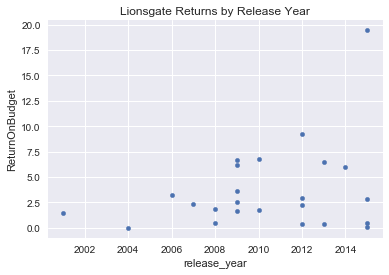

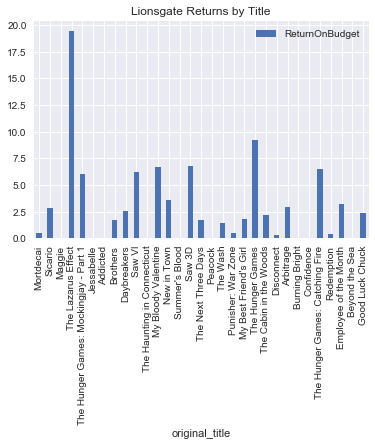

In [54]:
#Plotting Lionsgate's recent performance and movie title returns
dfbbprodslist[dfbbprodslist['mainprod']=='Lionsgate'].plot(x='release_year', y='ReturnOnBudget', kind='scatter', title='Lionsgate Returns by Release Year')
dfbbprodslist[dfbbprodslist['mainprod']=='Lionsgate'].plot(x='original_title', y='ReturnOnBudget', kind='bar', title='Lionsgate Returns by Title')

In [55]:
#Looking at the actors with the most lead actor roles since 2000
act2000 = df1[df1.release_year>=2000]['lead_actor'].value_counts().head(25)

Plotting the number of movies by Actor to see who has performed the most since the year 2000

Nicolas Cage has the most performances followed by Bruce Willis

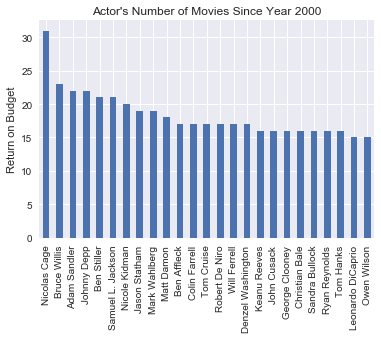

In [116]:
#Plotting the actors by number of roles
#Looks like Nicolas Cage is the hardest working actor in show business
act2000.plot(kind='bar', title="Actor's Number of Movies Since Year 2000")
plt.ylabel('Return on Budget')
plt.show()

In [57]:
#Creating an index to pull from
topact = act2000.index
topact

Index(['Nicolas Cage', 'Bruce Willis', 'Adam Sandler', 'Johnny Depp',
       'Ben Stiller', 'Samuel L. Jackson', 'Nicole Kidman', 'Jason Statham',
       'Mark Wahlberg', 'Matt Damon', 'Ben Affleck', 'Colin Farrell',
       'Tom Cruise', 'Robert De Niro', 'Will Ferrell', 'Denzel Washington',
       'Keanu Reeves', 'John Cusack', 'George Clooney', 'Christian Bale',
       'Sandra Bullock', 'Ryan Reynolds', 'Tom Hanks', 'Leonardo DiCaprio',
       'Owen Wilson'],
      dtype='object')

In [58]:
#Calculating which actor has the highest return in terms of revenue/budget
topacts = df1[(df1.ReturnOnBudget>1) & (df1.ReturnOnBudget<9999) & (df1['lead_actor'].isin(topact))]

When we look at the mean of the top actors based on return on budget Sandra Bullock and Ben Affleck are on top

In [59]:
#Sorting return on budget in descending order
topacts.groupby('lead_actor')['ReturnOnBudget'].mean().sort_values(ascending=False)

lead_actor
Sandra Bullock       9.162545
Ben Affleck          5.997031
Tom Cruise           5.288827
Tom Hanks            5.216445
Ryan Reynolds        4.614436
Owen Wilson          4.343980
Leonardo DiCaprio    3.831342
Bruce Willis         3.797727
Robert De Niro       3.749581
Keanu Reeves         3.595216
Adam Sandler         3.581205
Christian Bale       3.567581
Ben Stiller          3.401032
Nicole Kidman        3.370446
George Clooney       3.344641
Mark Wahlberg        3.126274
Nicolas Cage         3.085046
Matt Damon           2.967834
Will Ferrell         2.755251
Jason Statham        2.654036
Johnny Depp          2.548096
Colin Farrell        2.415430
Denzel Washington    2.326889
John Cusack          2.221242
Samuel L. Jackson    2.190920
Name: ReturnOnBudget, dtype: float64

When we look at the median: Tom Hanks stands out as most successful

Ryan Reynolds looks like an undervalued actor with good returns

In [60]:
#When we look at the median, Tom Hanks stands. Ryan Reynolds looks like an undervalued actor with good returns
topacts.groupby('lead_actor')['ReturnOnBudget'].median().sort_values(ascending=False)

lead_actor
Tom Hanks            4.773690
Sandra Bullock       4.711111
Ryan Reynolds        4.522872
Owen Wilson          3.849860
Tom Cruise           3.639010
Leonardo DiCaprio    3.472332
Christian Bale       2.983519
George Clooney       2.863723
Keanu Reeves         2.852004
Bruce Willis         2.793976
Adam Sandler         2.768603
Ben Stiller          2.752707
Mark Wahlberg        2.723397
Nicolas Cage         2.586443
Ben Affleck          2.567706
Robert De Niro       2.489029
Matt Damon           2.488180
Johnny Depp          2.486415
Will Ferrell         2.361927
Samuel L. Jackson    2.104907
Denzel Washington    2.075256
Nicole Kidman        2.052392
Jason Statham        1.957223
John Cusack          1.776206
Colin Farrell        1.590417
Name: ReturnOnBudget, dtype: float64

Now Plotting Tom Hank's Return by movie trying to see his biggest returns by title

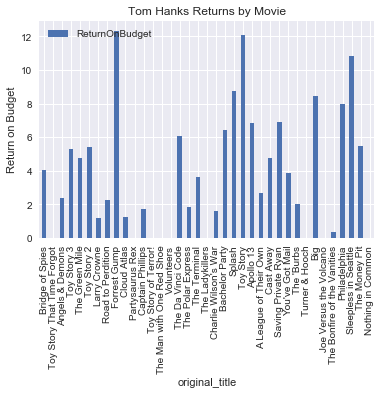

In [123]:
#We are plotting Tom Hank's success in his movies
df1[df1['lead_actor']=='Tom Hanks'].plot(x='original_title', y='ReturnOnBudget', kind='bar', title='Tom Hanks Returns by Movie')
plt.ylabel('Return on Budget')
plt.show()

Ben Affleck is very successfull but one major outlier (Chasing Amy) inflated his average return

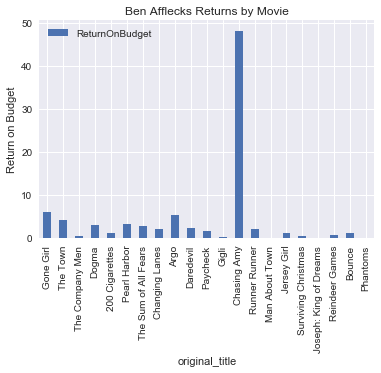

In [125]:
#Exploring Ben Affleck's work to see why he's number 2
df1[df1['lead_actor']=='Ben Affleck'].plot(x='original_title', y='ReturnOnBudget', kind='bar', title='Ben Afflecks Returns by Movie')
plt.ylabel('Return on Budget')
plt.show()

Now looking at Sandra Bullock to see her performance by movie

Look's like she also has an outlier with her movie "The Net" which we will hold in our next step

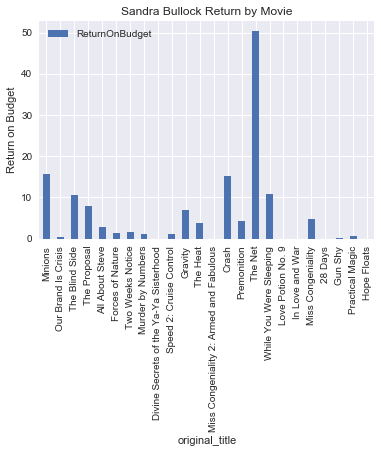

In [126]:
#Looks like Sandra Bullock also had an outlier also with The Net
df1[df1['lead_actor']=='Sandra Bullock'].plot(x='original_title', y='ReturnOnBudget', kind='bar', title='Sandra Bullock Return by Movie')
plt.ylabel('Return on Budget')
plt.show()

In [64]:
#When we control for these two outliers we get a more accurate view
topacts = df1[(df1.ReturnOnBudget>1) & (df1.ReturnOnBudget<9999) & (df1['lead_actor'].isin(topact))  & (df1.original_title != 'The Net') & (df1.original_title != 'Chasing Amy')]

Sandra Bullock is still on top as the most profitable actress in terms of Return on Budget even holding The Net's success

In [65]:
topacts.groupby('lead_actor')['ReturnOnBudget'].mean().sort_values(ascending=False)

lead_actor
Sandra Bullock       6.225195
Tom Cruise           5.288827
Tom Hanks            5.216445
Ryan Reynolds        4.614436
Owen Wilson          4.343980
Leonardo DiCaprio    3.831342
Bruce Willis         3.797727
Robert De Niro       3.749581
Keanu Reeves         3.595216
Adam Sandler         3.581205
Christian Bale       3.567581
Ben Stiller          3.401032
Nicole Kidman        3.370446
George Clooney       3.344641
Mark Wahlberg        3.126274
Nicolas Cage         3.085046
Matt Damon           2.967834
Ben Affleck          2.759488
Will Ferrell         2.755251
Jason Statham        2.654036
Johnny Depp          2.548096
Colin Farrell        2.415430
Denzel Washington    2.326889
John Cusack          2.221242
Samuel L. Jackson    2.190920
Name: ReturnOnBudget, dtype: float64

Now lets take out some of the films that have wrong budget info and could conflict with our search for the top performing movie

First I saw we have a few movies that are throwing the Return on Budget off so We are going to update their budgets

In [66]:
#I already pulled some data and know that 3 movies have incorrect budgets that are not Zero and will throw this off
df1[df1.original_title== 'Into the Night']

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,maindir,mainprod,maingenre,ReturnOnBudget
6179,tt0089346,0.132713,114,6700000,Into the Night,"[Jeff Goldblum, Michelle Pfeiffer, Stacey Pick...",[John Landis],"[adultery, assassin, airport, daily life, chase]",115,"[Comedy, Drama, Thriller]",...,6.1,1985,231.09693,13582012.55,Jeff Goldblum,Michelle Pfeiffer,John Landis,Universal Pictures,Comedy,58771.929813


In [67]:
#I can also use the at function when I know the row
df1.at[6179, 'original_title']

'Into the Night'

In [68]:
#I can update the budget like this with teh at function
df1.at[6179, 'budget_adj'] = 1000000

In [69]:
#And now the budget is updated
df1[df1.original_title== 'Into the Night']

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,maindir,mainprod,maingenre,ReturnOnBudget
6179,tt0089346,0.132713,114,6700000,Into the Night,"[Jeff Goldblum, Michelle Pfeiffer, Stacey Pick...",[John Landis],"[adultery, assassin, airport, daily life, chase]",115,"[Comedy, Drama, Thriller]",...,6.1,1985,1000000.0,13582012.55,Jeff Goldblum,Michelle Pfeiffer,John Landis,Universal Pictures,Comedy,58771.929813


In [70]:
#I did some research and know the 3 movies that have incorrect budgets so I pull there indicies
offbudgets = df1[(df1.original_title == 'Into the Night') | (df1.original_title == 'From Prada to Nada') | (df1.original_title == 'Love, Wedding, Marriage')].index
offbudgets

Int64Index([3581, 3608, 6179], dtype='int64')

In [71]:
#I then run a function to update their budget_adj to 5MM each
for row in offbudgets:
    df1.at[row, 'budget_adj'] = 5000000
#I am pringing their budgets just to make sure
for row in offbudgets:
    print(df1.at[row, 'budget_adj'])

5000000.0
5000000.0
5000000.0


In [72]:
#Recalculating the return on budget with the new budget amounts for those movies
df1['ReturnOnBudget'] = df1['revenue_adj']/df1['budget_adj']

# And now we are going to look at the most profitable movies of all time!!!!

# The Top 10 Most Profitable Movies are.......

In [73]:
#I am now putting the list of top films together
Topfilms = df1[(df1.ReturnOnBudget>1) & (df1.ReturnOnBudget<99999)]

In [74]:
#Now sorting it based on the top 10 (ascending = false puts it in descending order)
top10 = Topfilms.sort_values(['ReturnOnBudget'], ascending = False).head(10)

In [75]:
#I am now displaying those 10 in ascending order so we can have a countdown
top10.sort_values(['ReturnOnBudget']).head(9)

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,maindir,mainprod,maingenre,ReturnOnBudget
10759,tt0077651,1.198849,300000,70000000,Halloween,"[Donald Pleasence, Jamie Lee Curtis, P.J. Sole...",[John Carpenter],"[female nudity, nudity, mask, babysitter, hall...",91,"[Horror, Thriller]",...,7.3,1978,1.002810e+06,2.339890e+08,Donald Pleasence,Jamie Lee Curtis,John Carpenter,Compass International Pictures,Horror,233.333333
7827,tt0079501,2.012021,400000,100000000,Mad Max,"[Mel Gibson, Joanne Samuel, Hugh Keays-Byrne, ...",[George Miller],"[chain, baby, bridge, post-apocalyptic, dystopia]",93,"[Adventure, Action, Thriller, Science Fiction]",...,6.5,1979,1.201822e+06,3.004554e+08,Mel Gibson,Joanne Samuel,George Miller,Kennedy Miller Productions,Adventure,250.000000
9762,tt0072271,0.906087,85000,30859000,The Texas Chain Saw Massacre,"[Allen Danziger, Paul A. Partain, William Vail...",[Tobe Hooper],"[texas, chain saw, gore, midnight movie, surpr...",83,"[Horror, Thriller]",...,6.8,1974,3.758941e+05,1.364673e+08,Allen Danziger,Paul A. Partain,Tobe Hooper,Vortex,Horror,363.047059
7057,tt0374102,0.762134,130000,54667954,Open Water,"[Blanchard Ryan, Daniel Travis, Saul Stein, Mi...",[Chris Kentis],"[diving, cataclysm, nightmare, panic, red sea]",79,"[Drama, Thriller]",...,5.3,2004,1.500779e+05,6.311117e+07,Blanchard Ryan,Daniel Travis,Chris Kentis,Plunge Pictures LLC,Drama,420.522723
242,tt2309260,0.532205,100000,42664410,The Gallows,"[Cassidy Gifford, Ryan Shoos, Pfeifer Brown, R...","[Travis Cluff, Chris Lofing]","[gallows, high school, tragedy, hanging, found...",87,"[Horror, Thriller]",...,5.0,2015,9.199996e+04,3.925124e+07,Cassidy Gifford,Ryan Shoos,Travis Cluff,New Line Cinema,Horror,426.644100
7178,tt0390521,0.263897,65000,28575078,Super Size Me,"[Morgan Spurlock, Daryl Isaacs, Lisa Ganjhu, S...",[Morgan Spurlock],"[experiment, health, junk food, food industry,...",100,"[Documentary, Comedy, Drama]",...,6.5,2004,7.503895e+04,3.298837e+07,Morgan Spurlock,Daryl Isaacs,Morgan Spurlock,Kathbur Pictures,Documentary,439.616585
7277,tt0069089,0.412913,12000,6000000,Pink Flamingos,"[Divine, David Lochary, Mary Vivian Pearce, Mi...",[John Waters],"[gay, trailer park, pop culture, drug dealer, ...",93,[Comedy],...,6.3,1972,6.257473e+04,3.128737e+07,Divine,David Lochary,John Waters,Dreamland Productions,Comedy,500.000000
1354,tt0074486,0.331417,10000,7000000,Eraserhead,"[Jack Nance, Charlotte Stewart, Allen Joseph, ...",[David Lynch],"[baby, mutant, claustrophobia, nightmare, pare...",89,"[Science Fiction, Fantasy, Horror, Drama]",...,7.1,1977,3.597781e+04,2.518447e+07,Jack Nance,Charlotte Stewart,David Lynch,American Film Institute (AFI),Science Fiction,700.000000
2449,tt0185937,0.934621,25000,248000000,The Blair Witch Project,"[Heather Donahue, Michael C. Williams, Joshua ...","[Daniel Myrick, Eduardo SÃ¡nchez]","[witch, voodoo, legend, sorcery, maryland]",81,"[Horror, Mystery]",...,6.3,1999,3.272632e+04,3.246451e+08,Heather Donahue,Michael C. Williams,Daniel Myrick,Artisan Entertainment,Horror,9920.000003


We can see the most profitable movies of all time are horror movies and were shot on small budgets

When we look back at the directors most profitable films they were all shot on small budgets and got them mass success

# And now... The most profitable movie of all time is...

Paranormal Activity! Shot with a budget of around 15,000 it brought in over 200,000,000!

That's a return on investment of 1,289,038% or 12,890x

Here are some fun facts about the movie https://moviepilot.com/posts/2276682

In [76]:
top10.sort_values(['ReturnOnBudget'], ascending = False).head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,lead_actor,supporting_actor,maindir,mainprod,maingenre,ReturnOnBudget
7447,tt1179904,1.120442,15000,193355800,Paranormal Activity,"[Katie Featherston, Micah Sloat, Mark Fredrich...",[Oren Peli],"[haunting, psychic, entity, demonic possession...",86,"[Horror, Mystery]",...,6.1,2007,15775.02874,203346220.1,Katie Featherston,Micah Sloat,Oren Peli,Blumhouse Productions,Horror,12890.386664


The limitations to the dataset that I ran into was the fact that budget information was not updated for some movies. While this did not get in the way of us finding the most profitable movie of all time, it would be helpful in finding small box office successes.

I would conclude that horror & documentary movies can be very profitable based on the fact that they do not require big budgets but skilled directing and producing. If I were take my analysis further I would study key words and themes of what makes successful movies on a smaller scale so we could unlock the keys to success on a smaller scale. Also what themes make up big block buster movie successes and apply them to smaller niche audiences and vice versa.

This was a great exercise in understanding the movie market. While we think a lot of this information is intuitive to us as American's we can apply this data hacking to different verticals, markets, and platforms to get a better understanding of the secret sauce that creates success, find winning production houses, directors, and spot trends.